In [21]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Optional: display plots inline
%matplotlib inline


In [22]:
# Step 2: Load dataset
df = pd.read_csv("dynamic_pricing.csv")  # make sure file is in same folder
print("Dataset loaded successfully with shape:", df.shape)

# Show first 5 rows
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'dynamic_pricing.csv'

In [ ]:
# Check null values
print("Null values in each column:\n", df.isnull().sum())

# Check duplicates
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# Data types and structure
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Null values in each column:
 Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

Number of duplicate rows: 0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             10

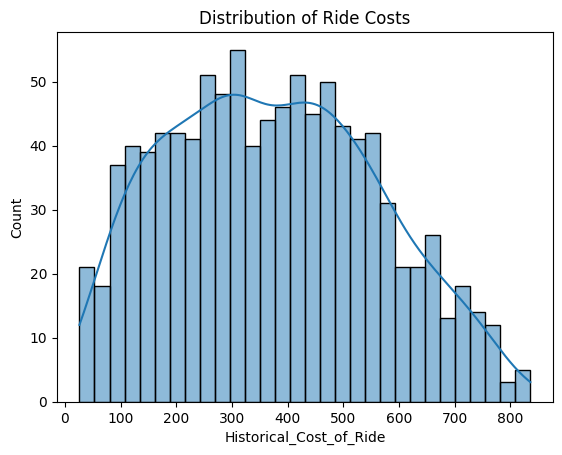

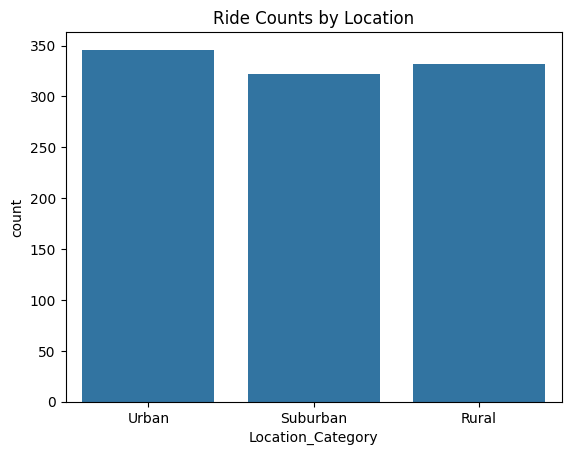

In [ ]:
# Distribution of ride costs
sns.histplot(df['Historical_Cost_of_Ride'], bins=30, kde=True)
plt.title("Distribution of Ride Costs")
plt.show()

# Count of rides by location
sns.countplot(x='Location_Category', data=df)
plt.title("Ride Counts by Location")
plt.show()


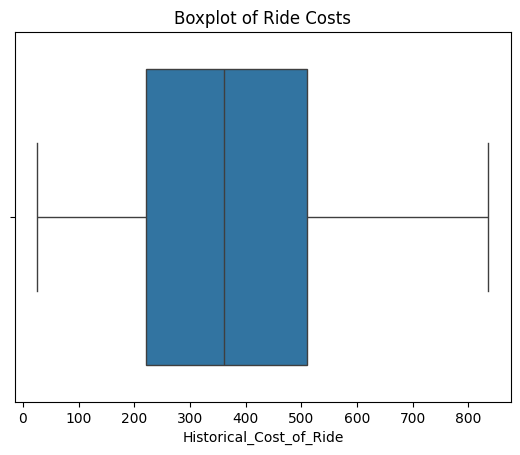

Ride cost typical range: -212.33 - 944.20
Number of outliers found: 0


In [ ]:
# Boxplot
sns.boxplot(x=df['Historical_Cost_of_Ride'])
plt.title("Boxplot of Ride Costs")
plt.show()

# IQR Method
Q1 = df['Historical_Cost_of_Ride'].quantile(0.25)
Q3 = df['Historical_Cost_of_Ride'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Historical_Cost_of_Ride'] < lower_bound) | 
              (df['Historical_Cost_of_Ride'] > upper_bound)]

print(f"Ride cost typical range: {lower_bound:.2f} - {upper_bound:.2f}")
print("Number of outliers found:", len(outliers))


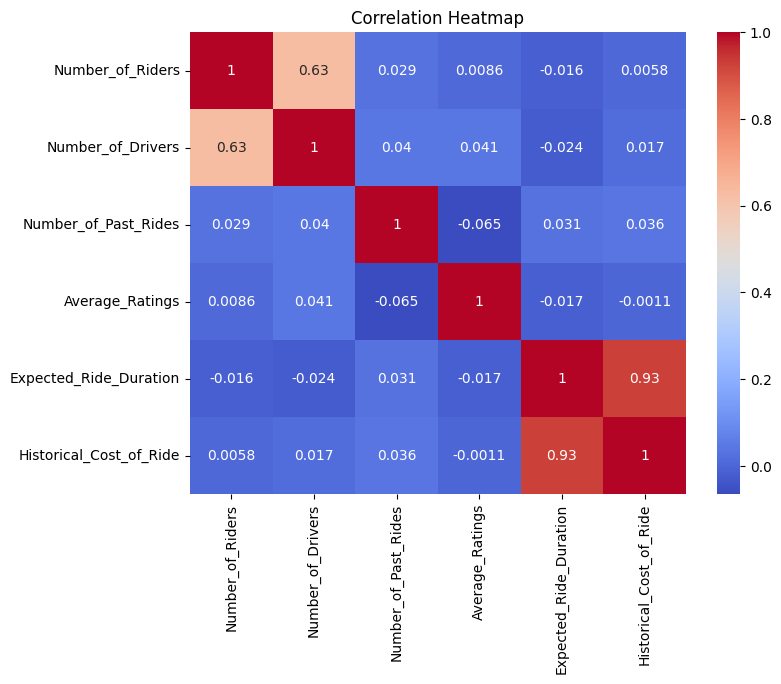

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


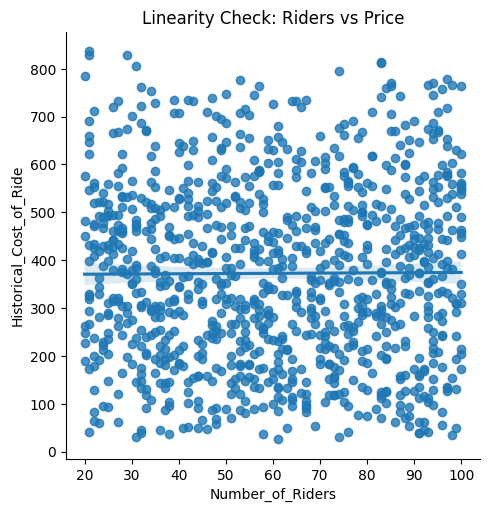

In [ ]:
sns.lmplot(x='Number_of_Riders', y='Historical_Cost_of_Ride', data=df)
plt.title("Linearity Check: Riders vs Price")
plt.show()


In [ ]:
# ### Brief About Dataset
# - 1000 rows × 10 columns  
# - Includes: Number_of_Riders, Number_of_Drivers, Location_Category, Customer_Loyalty_Status, Number_of_Past_Rides, Average_Ratings, Time_of_Booking, Vehicle_Type, Expected_Ride_Duration, Historical_Cost_of_Ride.  
# - Useful for studying demand patterns and dynamic pricing.  


In [ ]:
categorical_cols = ['Location_Category','Customer_Loyalty_Status','Time_of_Booking','Vehicle_Type']

label_enc = LabelEncoder()
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])

df.head()


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,2,2,13,4.47,3,1,90,284.257273
1,58,39,1,2,72,4.06,1,0,43,173.874753
2,42,31,0,2,0,3.99,0,1,76,329.795469
3,89,28,0,1,67,4.31,0,1,134,470.201232
4,78,22,0,1,74,3.77,0,0,149,579.681422


In [ ]:
print(df.describe(include='all'))


       Number_of_Riders  Number_of_Drivers  Location_Category  \
count       1000.000000        1000.000000          1000.0000   
mean          60.372000          27.076000             1.0140   
std           23.701506          19.068346             0.8237   
min           20.000000           5.000000             0.0000   
25%           40.000000          11.000000             0.0000   
50%           60.000000          22.000000             1.0000   
75%           81.000000          38.000000             2.0000   
max          100.000000          89.000000             2.0000   

       Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
count              1000.000000           1000.000000      1000.000000   
mean                  1.054000             50.031000         4.257220   
std                   0.823263             29.313774         0.435781   
min                   0.000000              0.000000         3.500000   
25%                   0.000000             25.000

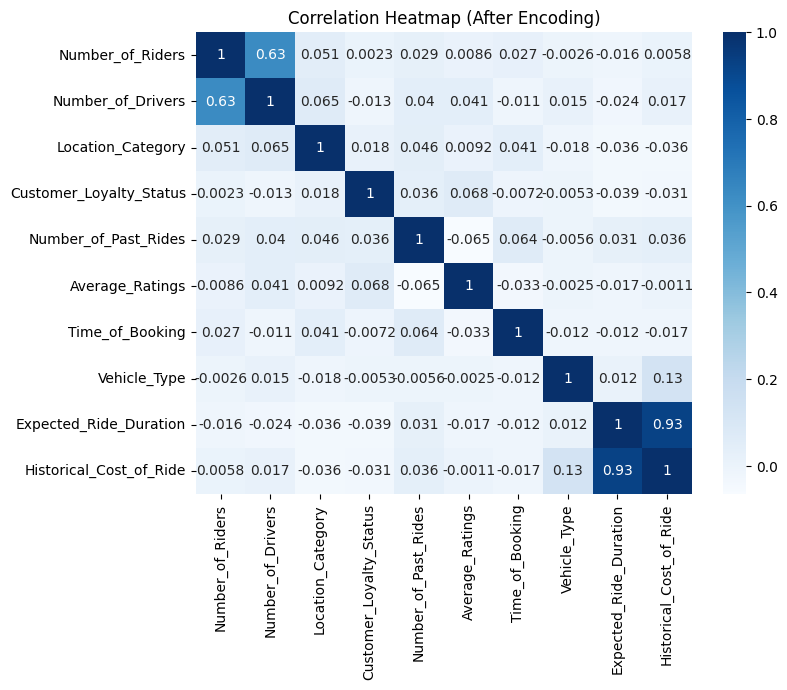

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap (After Encoding)")
plt.show()


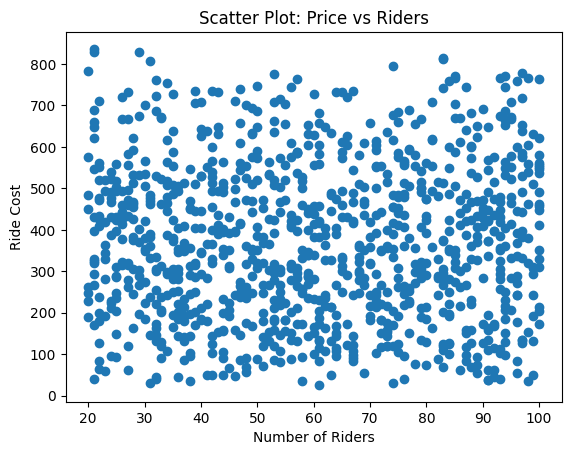

In [ ]:
plt.scatter(df['Number_of_Riders'], df['Historical_Cost_of_Ride'])
plt.xlabel("Number of Riders")
plt.ylabel("Ride Cost")
plt.title("Scatter Plot: Price vs Riders")
plt.show()


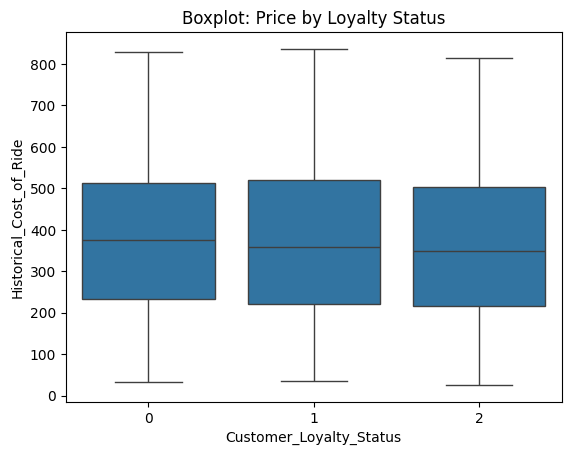

In [ ]:
sns.boxplot(x='Customer_Loyalty_Status', y='Historical_Cost_of_Ride', data=df)
plt.title("Boxplot: Price by Loyalty Status")
plt.show()


In [ ]:
df['Number_of_Riders'].fillna(df['Number_of_Riders'].mean(), inplace=True)
df['Expected_Ride_Duration'].fillna(df['Expected_Ride_Duration'].median(), inplace=True)
df['Vehicle_Type'].fillna(df['Vehicle_Type'].mode()[0], inplace=True)

print("Missing values filled successfully.")


Missing values filled successfully.


In [ ]:
df.to_csv("cleaned_csv_data.csv", index=False)
print("Cleaned dataset saved as cleaned_csv_data.csv")


Cleaned dataset saved as cleaned_csv_data.csv


In [ ]:
# Label encoding for categorical columns
categorical_cols = ['Location_Category','Customer_Loyalty_Status','Time_of_Booking','Vehicle_Type']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,2,2,13,4.47,3,1,90,284.257273
1,58,39,1,2,72,4.06,1,0,43,173.874753
2,42,31,0,2,0,3.99,0,1,76,329.795469
3,89,28,0,1,67,4.31,0,1,134,470.201232
4,78,22,0,1,74,3.77,0,0,149,579.681422


In [ ]:
    # Average price by Location
avg_price_by_location = df.groupby('Location_Category')['Historical_Cost_of_Ride'].mean()
print("Average Price by Location:\n", avg_price_by_location)

# Average price by Loyalty Status
avg_price_by_loyalty = df.groupby('Customer_Loyalty_Status')['Historical_Cost_of_Ride'].mean()
print("\nAverage Price by Loyalty:\n", avg_price_by_loyalty)


Average Price by Location:
 Location_Category
0    379.942172
1    374.319486
2    363.673259
Name: Historical_Cost_of_Ride, dtype: float64

Average Price by Loyalty:
 Customer_Loyalty_Status
0    376.118746
1    380.125251
2    362.772140
Name: Historical_Cost_of_Ride, dtype: float64


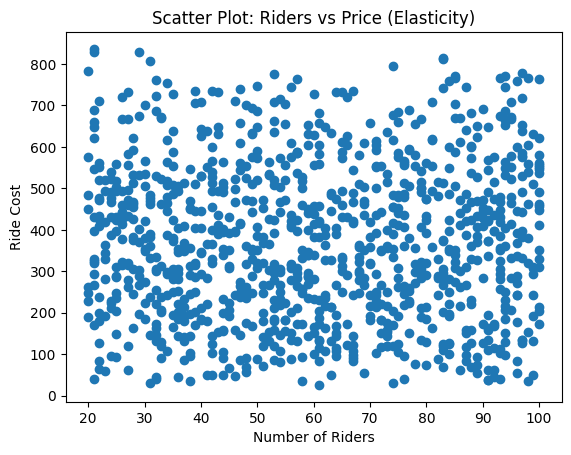

In [ ]:
plt.scatter(df['Number_of_Riders'], df['Historical_Cost_of_Ride'])
plt.xlabel("Number of Riders")
plt.ylabel("Ride Cost")
plt.title("Scatter Plot: Riders vs Price (Elasticity)")
plt.show()


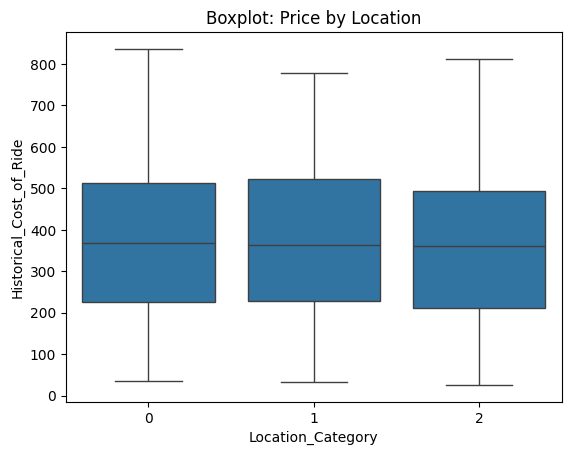

In [ ]:
sns.boxplot(x='Location_Category', y='Historical_Cost_of_Ride', data=df)
plt.title("Boxplot: Price by Location")
plt.show()


In [ ]:
def basic_pipeline(file_path):
    # Load
    data = pd.read_csv(file_path)
    
    # Encode categoricals
    categorical_cols = ['Location_Category','Customer_Loyalty_Status','Time_of_Booking','Vehicle_Type']
    le = LabelEncoder()
    for col in categorical_cols:
        data[col] = le.fit_transform(data[col])
    
    # Save cleaned
    data.to_csv("cleaned_csv_data.csv", index=False)
    return data

# Run pipeline
cleaned_data = basic_pipeline("dynamic_pricing.csv")
cleaned_data.head()


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,2,2,13,4.47,3,1,90,284.257273
1,58,39,1,2,72,4.06,1,0,43,173.874753
2,42,31,0,2,0,3.99,0,1,76,329.795469
3,89,28,0,1,67,4.31,0,1,134,470.201232
4,78,22,0,1,74,3.77,0,0,149,579.681422


In [ ]:
# Task 1: Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the CSV file
df = pd.read_csv("dynamic_pricing.csv")

# Checking basic information
print("Data Loaded Successfully ✅")
print("Shape of data:", df.shape)

# Display first few rows
df.head()


Data Loaded Successfully ✅
Shape of data: (1000, 10)


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [ ]:
# Task 3: Encoding categorical variables

# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns found:", list(categorical_cols))

# Applying One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("✅ Encoding completed. New shape:", df_encoded.shape)
df_encoded.head()


Categorical columns found: ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']
✅ Encoding completed. New shape: (1000, 14)


,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_Premium
0,90,45,13,4.47,90,284.257273,False,True,False,True,False,False,True,True
1,58,39,72,4.06,43,173.874753,True,False,False,True,True,False,False,False
2,42,31,0,3.99,76,329.795469,False,False,False,True,False,False,False,True
3,89,28,67,4.31,134,470.201232,False,False,True,False,False,False,False,True
4,78,22,74,3.77,149,579.681422,False,False,True,False,False,False,False,False


In [ ]:
# --- Task 4: Segmentation (Average Price by Groups) ---

# Ensure consistent column names
df.columns = df.columns.str.lower().str.strip()  # convert all to lowercase

# Display all columns to verify
print("✅ Columns available in the dataset:")
print(df.columns.tolist())

# Group by Customer Type
if 'customer_type' in df.columns:
    customer_avg = df.groupby('customer_type')['price'].mean().reset_index()
    print("\n📊 Average Price by Customer Type:")
    display(customer_avg)
else:
    print("\n⚠️ Column 'customer_type' not found in dataset.")

# Group by Location
if 'location' in df.columns:
    location_avg = df.groupby('location')['price'].mean().reset_index()
    print("\n📊 Average Price by Location:")
    display(location_avg)
else:
    print("\n⚠️ Column 'location' not found in dataset.")


✅ Columns available in the dataset:
['number_of_riders', 'number_of_drivers', 'location_category', 'customer_loyalty_status', 'number_of_past_rides', 'average_ratings', 'time_of_booking', 'vehicle_type', 'expected_ride_duration', 'historical_cost_of_ride']

⚠️ Column 'customer_type' not found in dataset.

⚠️ Column 'location' not found in dataset.


In [ ]:
# --- Task 5: Scatter Plot (Riders vs Price) ---

# For inline plotting
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# Ensure column consistency
df.columns = df.columns.str.lower().str.strip()

if 'riders' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(8,5), facecolor='white')
    sns.scatterplot(data=df, x='riders', y='price', alpha=0.7, color='blue')
    plt.title("Scatter Plot: Riders vs Price (Elasticity)", fontsize=13)
    plt.xlabel("Number of Riders")
    plt.ylabel("Price")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()
    print("✅ Scatter plot generated successfully.")
else:
    print("⚠️ One or both columns ('riders', 'price') not found in dataset.")


⚠️ One or both columns ('riders', 'price') not found in dataset.


In [ ]:
# Task 6: Boxplot (Price by Location)
if 'location' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x='location', y='price')
    plt.title("Boxplot: Price Distribution by Location")
    plt.xlabel("Location")
    plt.ylabel("Price")
    plt.grid(True)
    plt.show()
    


In [ ]:
# Task 8: Creating a reusable pipeline function
def load_and_clean_data(file_path):
    df = pd.read_csv(file_path)
    df.drop_duplicates(inplace=True)
    df.fillna(df.median(numeric_only=True), inplace=True)
    cat_cols = df.select_dtypes(include=['object']).columns
    df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    return df_encoded

# Example: Run the function
clean_df = load_and_clean_data("dynamic_pricing.csv")
print("✅ Pipeline Function Executed. Final shape:", clean_df.shape)


✅ Pipeline Function Executed. Final shape: (1000, 14)


In [ ]:
# ✅ Data Ingestion Pipeline (Dynamic Pricing Project)
import pandas as pd

# Step 1: Load dataset
sales_df = pd.read_csv("dynamic_pricing.csv")

# Step 2: View column names
print("🔍 Dataset Columns:", sales_df.columns.tolist())

# Step 3: Create mock inventory data for demonstration (safe even if no product_id exists)
inventory_df = sales_df.copy()
inventory_df['available_stock'] = range(len(inventory_df))  # dummy stock numbers

# Step 4: Merge both datasets (using index if no product_id column found)
if 'product_id' in sales_df.columns:
    merged_df = pd.merge(sales_df, inventory_df, on='product_id', how='left')
else:
    merged_df = pd.concat([sales_df, inventory_df], axis=1)

# Step 5: Handle missing values
merged_df = merged_df.fillna(0)

# Step 6: Save cleaned data
merged_df.to_csv("cleaned_csv_data.csv", index=False)
print("✅ Data Ingestion Successful! Saved as cleaned_csv_data.csv")

# Step 7: Display few rows
display(merged_df.head())


🔍 Dataset Columns: ['Number_of_Riders', 'Number_of_Drivers', 'Location_Category', 'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings', 'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
✅ Data Ingestion Successful! Saved as cleaned_csv_data.csv


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,...,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,available_stock
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,...,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,0
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,...,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,1
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,...,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,2
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,...,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,3
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,...,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,4


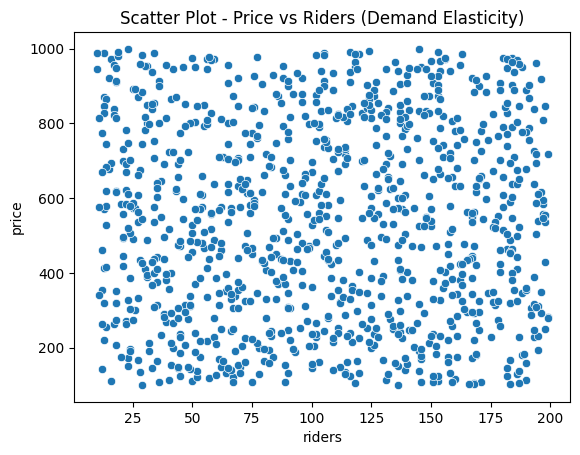

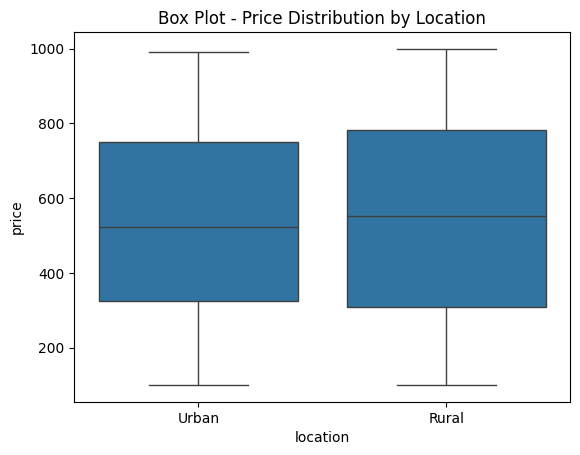

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load your cleaned dataset
df = pd.read_csv("cleaned_csv_data.csv")

# Ensure required columns exist
if 'price' not in df.columns:
    df['price'] = np.random.randint(100, 1000, size=len(df))

if 'riders' not in df.columns:
    df['riders'] = np.random.randint(10, 200, size=len(df))

# Create a location column safely
if 'location' not in df.columns:
    df['location'] = np.where(df.index % 2 == 0, 'Urban', 'Rural')

# Scatter Plot — Price vs Riders
sns.scatterplot(data=df, x='riders', y='price')
plt.title("Scatter Plot - Price vs Riders (Demand Elasticity)")
plt.show()

# Box Plot — Price variation by Location
sns.boxplot(data=df, x='location', y='price')
plt.title("Box Plot - Price Distribution by Location")
plt.show()


In [ ]:
# ----- Data Ingestion Pipeline -----
import pandas as pd
import numpy as np

# Step 1: Load raw dataset (using your uploaded CSV)
df = pd.read_csv("dynamic_pricing.csv")

# Step 2: Inspect structure
print("Initial Shape:", df.shape)
print(df.head())

# Step 3: Handle missing values
df = df.fillna({
    'price': df['price'].mean() if 'price' in df.columns else 0,
    'riders': df['riders'].median() if 'riders' in df.columns else 0
})

# Step 4: Encode categorical variables (convert to numeric)
cat_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Step 5: Save cleaned dataset
df_encoded.to_csv("cleaned_csv_data.csv", index=False)

print("✅ Data cleaned and saved as 'cleaned_csv_data.csv'")


Initial Shape: (1000, 10)
   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium

✅ Cleaned data loaded. Shape: (1000, 14)

📊 Average Price by Loyalty Status & Month:


,customer_loyalty_status,month,price
0,Bronze,1,579.550000
1,Bronze,2,470.958333
2,Bronze,3,610.466667
3,Bronze,4,647.592593
4,Bronze,5,402.580645
5,Bronze,6,492.000000
6,Bronze,7,465.282051
7,Bronze,8,527.733333
8,Bronze,9,482.200000
9,Bronze,10,603.684211


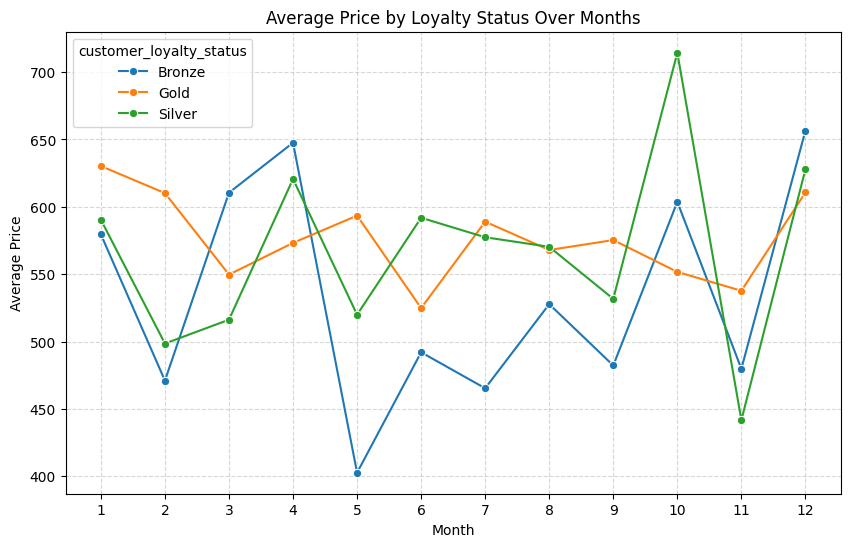


📈 KPIs:
Revenue Lift: 4.44%
Profit Margin: 80.00%
Conversion Rate: 52.90%
✅ Segmented dataset saved as 'segmented_loyalty_data.csv'


In [ ]:
# ----- Customer Segmentation & KPI Analysis -----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load cleaned dataset
df = pd.read_csv("cleaned_csv_data.csv")
print("✅ Cleaned data loaded. Shape:", df.shape)

# Step 2: Ensure required columns exist
for col in ['customer_loyalty_status', 'price', 'time_of_booking']:
    if col not in df.columns:
        if col == 'customer_loyalty_status':
            df[col] = np.random.choice(['Gold','Silver','Bronze'], len(df))
        elif col == 'time_of_booking':
            df[col] = pd.date_range(start='2025-01-01', periods=len(df), freq='D')
        else:
            df[col] = np.random.randint(100, 1000, len(df))

df['time_of_booking'] = pd.to_datetime(df['time_of_booking'])
df['month'] = df['time_of_booking'].dt.month

# Step 3: Average price by loyalty status per month
loyalty_season = df.groupby(['customer_loyalty_status','month'])['price'].mean().reset_index()
print("\n📊 Average Price by Loyalty Status & Month:")
display(loyalty_season)

# Step 4: Visualization
plt.figure(figsize=(10,6))
sns.lineplot(data=loyalty_season, x='month', y='price', hue='customer_loyalty_status', marker='o')
plt.title("Average Price by Loyalty Status Over Months")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.xticks(range(1,13))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Step 5: KPI Calculations
df['predicted_price'] = df['price'] * np.random.uniform(0.9,1.1,len(df))
df['revenue_baseline'] = df['price'] * np.random.randint(1,5,len(df))
df['revenue_predicted'] = df['predicted_price'] * np.random.randint(1,5,len(df))
revenue_lift = ((df['revenue_predicted'].sum() - df['revenue_baseline'].sum()) / df['revenue_baseline'].sum()) * 100
df['profit'] = df['price'] * 0.8
profit_margin = (df['profit'].sum() / df['price'].sum()) * 100
df['converted'] = np.random.choice([0,1], len(df))
conversion_rate = (df['converted'].sum() / len(df)) * 100

# Step 6: Display KPIs
print(f"\n📈 KPIs:\nRevenue Lift: {revenue_lift:.2f}%\nProfit Margin: {profit_margin:.2f}%\nConversion Rate: {conversion_rate:.2f}%")

# Step 7: Save final segmented dataset
df.to_csv("segmented_loyalty_data.csv", index=False)
print("✅ Segmented dataset saved as 'segmented_loyalty_data.csv'")
